In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier  # KNN算法

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
np.random.randn(10)

array([-0.60379681,  0.10621267, -1.68275614, -1.81392607,  0.41780955,
       -0.32175893, -0.22723907,  0.87251299, -0.26357775,  1.37605962])

# 通用学习模式练习

In [5]:
iris = datasets.load_iris()   # 导入鸢尾花这个库里已存在的数据集作为练习
print(iris)   # 整体看一下数据都包含些啥属性，行列，目测是有三个不同品种的花，在数据集中用0，1，2表征

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [6]:
iris_X = iris.data
iris_y = iris.target
print(iris_X[:2,:])  # 可以看出一个花有4个属性，然后用这些特征后面去做分类，也就是target里面的结果

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]]


In [7]:
# 分割数据集，定义训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(iris_X, iris_y, test_size=0.3)  # 这里设置测试集占总数据比例30%

knn = KNeighborsClassifier()  # 定义模型算法，采用knn，其实这个地方就是实例化对象
knn.fit(X_train, y_train)   # 拟合模型
print(knn.predict(X_test))
print(y_test)

[2 0 0 1 2 2 1 0 0 2 2 0 2 2 2 2 2 2 1 2 2 0 2 0 2 1 2 0 2 2 1 1 1 1 1 2 2
 1 1 2 0 2 2 1 2]
[2 0 0 1 2 2 1 0 0 2 2 0 2 2 1 2 2 2 1 2 2 0 2 0 2 1 2 0 2 2 1 1 1 1 1 1 2
 1 1 2 0 2 2 1 2]


# datasets数据集模块

In [6]:
# 在sklearn这个库中我们甚至可以自己创造一些数据集来进行训练，以linear regression为例
from sklearn.linear_model import LinearRegression
loaded_data = datasets.load_boston()   # 导入波士顿房价数据集
data_X = loaded_data.data
data_y = loaded_data.target

model = LinearRegression()
model.fit(data_X,data_y)
print(model.predict(data_X[:4,:]))
print(data_y[:4])

[30.00384338 25.02556238 30.56759672 28.60703649]
[24.  21.6 34.7 33.4]


/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the C

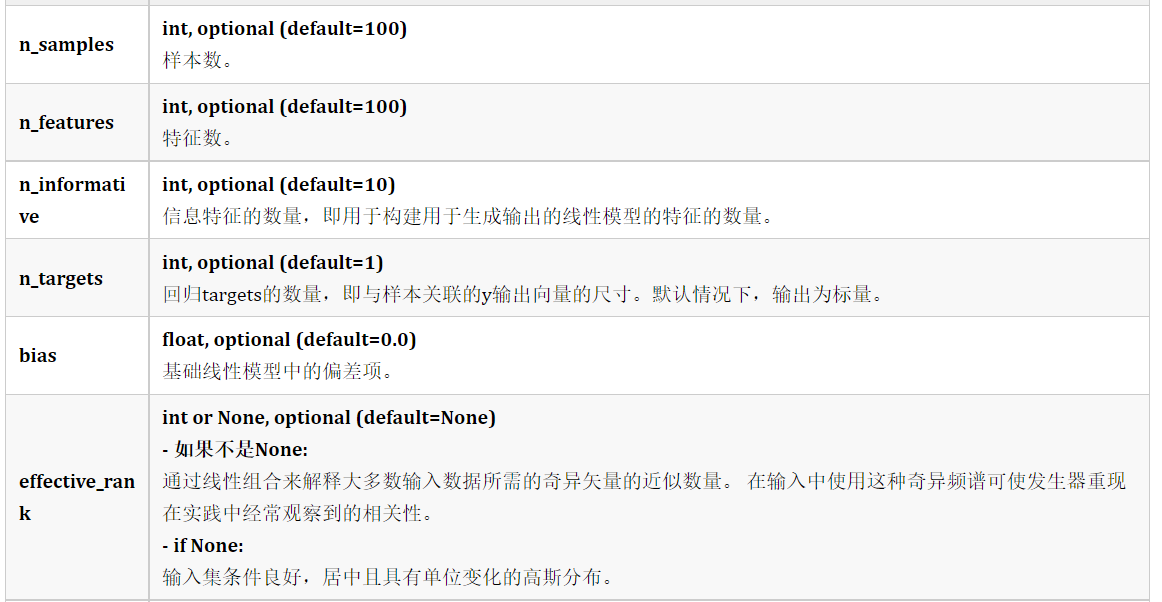

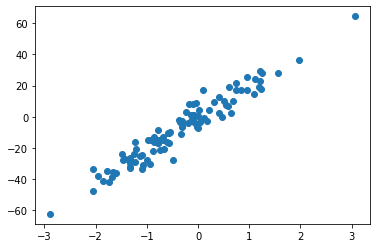

In [7]:
# 这里为了画图清晰可视化，特征数量选择为1
X, y = datasets.make_regression(n_samples=100, n_features=1, n_targets=1, noise=5)             # 自己创造一些真实的数据去训练
plt.scatter(X,y)


# MODEL常用属性和功能

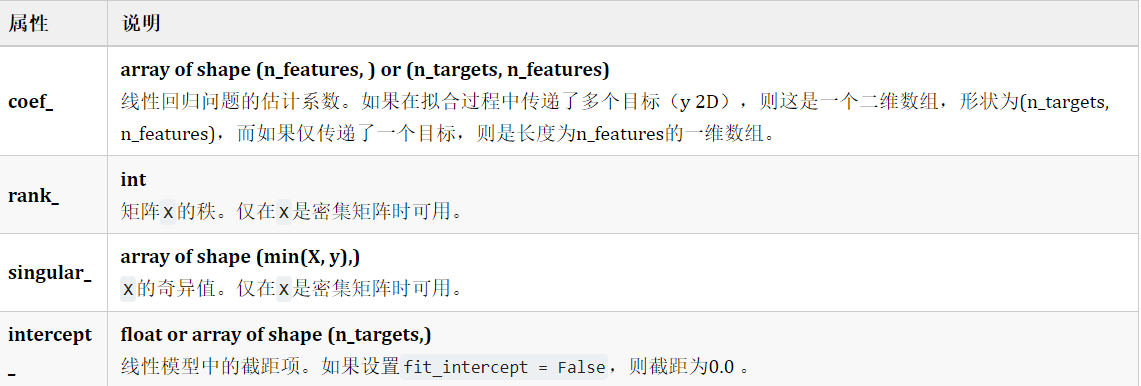

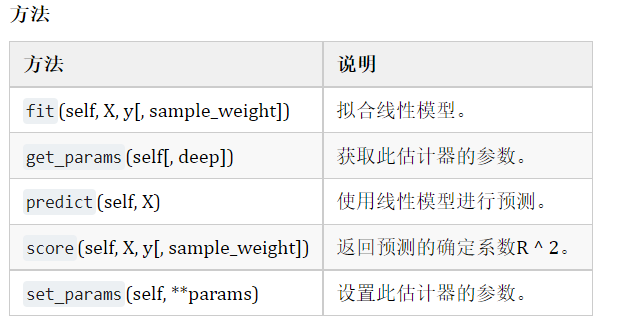

In [8]:
# 不同模型一般会有不同的属性，这些具体要去官方文档查询
print(model.coef_)    # 输出模型预测出来的权值，当然也可以在fit之前输出，但很显然得到的值一定是原先实例化的对象
print(model.intercept_)   # 输出模型预测出来的偏置

[-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]
36.45948838509034


In [9]:
print(model.get_params())    # 输出模型创建时的各种参数

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': 'deprecated', 'positive': False}


In [10]:
print(model.score(data_X,data_y))  # 评估模型的拟合，是个-∞到1百分比的值，显然越接近1拟合效果越好

0.7406426641094094


# normalization标准化数据（重要）（不一定是归一化0-1）

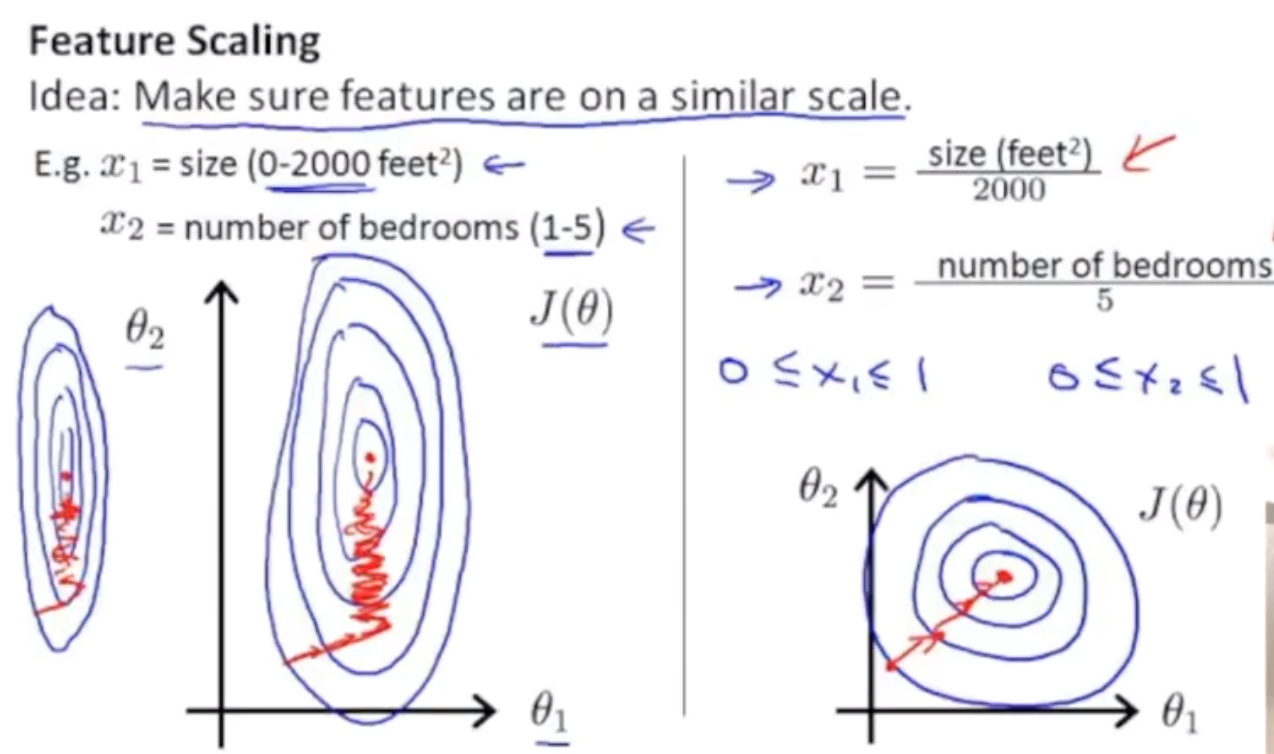

<br>**我们为什么要进行数据的标准化处理？**

<br>**比如说两个数据的取值范围差很多的时候，计算机进行参数模拟的效率就会很低，因为尺度相差很多，梯度下降找最优解的时候跨度就会很大，耗费很多算力和资源，所以我们总是希望数据的尺度规模是在同一个比例下的，因此在训练之前总要统一到相同scale**

**以KNN为例，假如两个特征数据的尺度不一致，很可能影响最后分类的预测结果，因为尺度大的显然影响越大。另外就是数据本身也不一定是相同的类型，比如说房价本身价格就很高，但是分类类型可能范围就只有1-10，所以没法放在不同尺度比较**

In [11]:
from sklearn import preprocessing

In [12]:
a = np.array([[10,2.7,3.6],
             [-100,5,-2],
             [120,20,40]], dtype=np.float64)
print(a)   # 三个特征数据
print(preprocessing.scale(a))    # 这只是preprocessing中一种标准化的方法，还有很多处理数据的方式，具体看官方文档

[[  10.     2.7    3.6]
 [-100.     5.    -2. ]
 [ 120.    20.    40. ]]
[[ 0.         -0.85170713 -0.55138018]
 [-1.22474487 -0.55187146 -0.852133  ]
 [ 1.22474487  1.40357859  1.40351318]]


In [13]:
from sklearn.svm import SVC   # 用支持向量机来做分类模型

0.9888888888888889


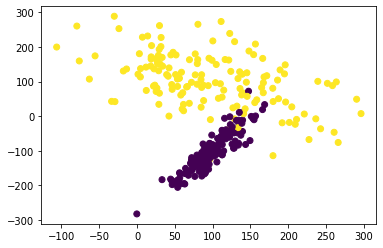

In [14]:
# 生成一些data
# random_state 随机数种子 来确定每次产生的随机数是否一致，虽然在生成数据的时候是随机的，但是每运行一次程序要使得到的结果一样
# 就必须指定随机种子为一个int值，值可以任意写一个数字，在深度学习中我们也常需要指定，还有shuffle参数
# random_state并不意味着总是使用随机化，因为它可能取决于另一个参数，例如shuffle，当该参数存在时，只有被设置为True才会存在随机性问题
# scale参数的作用是将特征乘以指定值，默认值为1
X, y = datasets.make_classification(n_samples=300, n_features=2, n_redundant=0, n_informative=2, random_state=42, n_clusters_per_class=1, scale=100)
plt.scatter(X[:,0],X[:,1],c=y)

# 通常来讲都需要做数据的标准化处理，模型效果才会更好（当然也不一定）
X = preprocessing.minmax_scale(X, feature_range=(-1,1))   # 我们前面已经学习了scale方法，这里使用minmax可以指定标准化后值得范围
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
clf = SVC()
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

# K折交叉验证

Text(0, 0.5, 'Cross-Validated Accuracy')

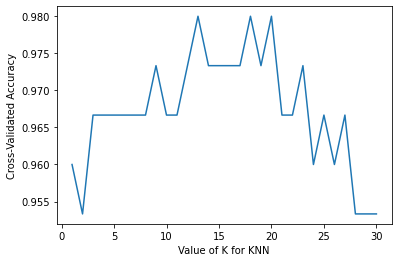

In [2]:
from sklearn.model_selection import cross_val_score
iris = datasets.load_iris()
X = iris.data
y = iris.target

k_range = range(1,31)   # 可以看一下在knn算法中不同neighbors带来的结果影响
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)  # 指定邻居数目
    # 回归的时候用损失函数的平均误差衡量，分类问题检测准确度
    # 注意使用交叉验证只是为了使模型的打分看起来更准确，因为做了取平均的处理，但并不表示模型的性能会更好
    loss = -cross_val_score(knn, X, y, cv=10, scoring='neg_mean_squared_error')  # for regression
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')  # for classification
    # cv参数是指定数据集划分为几次验证，每次测试集移动一定单元，直到所有次数执行完，scoring规定表征方法
    k_scores.append(scores.mean())
    
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

# 交叉验证2（学习曲线）

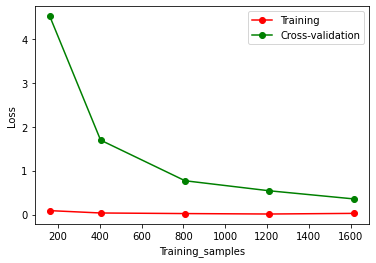

In [2]:
from sklearn.model_selection import learning_curve
from sklearn.datasets import load_digits
from sklearn.svm import SVC

digits = load_digits()
X = digits.data
y = digits.target
train_sizes, train_loss, test_loss = learning_curve(SVC(gamma=0.001), X, y, cv=10, 
                                                    scoring='neg_mean_squared_error',
                                                    train_sizes=[0.1, 0.25, 0.5, 0.75, 1])
# 我们分析一下train_loss的结果很容易知道，总共曲线要训练5次，因为train_sizes指定了5个不同大小
# 而每次不同训练集大小的时候又会进行cv=10次的损失函数计算，也就是说train_loss得到的结果是5行10列的
# 我们可视化的时候横轴是基于train_sizes的，所以要对每次不同的sizes损失结果取平均，也就是为什么axis=1
train_loss_mean = -np.mean(train_loss, axis = 1)
test_loss_mean = -np.mean(test_loss, axis = 1)

plt.plot(train_sizes, train_loss_mean, 'o-', color="r", label="Training")
plt.plot(train_sizes, test_loss_mean, 'o-', color="g", label="Cross-validation")
plt.xlabel('Training_samples')
plt.ylabel('Loss')
plt.legend(loc='best')

# 交叉验证3：如何调参避免过拟合

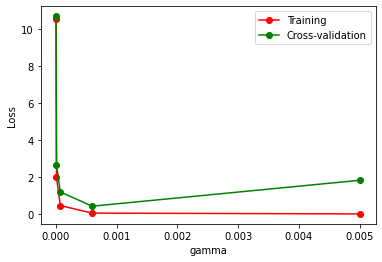

In [3]:
# 用于确定不同参数值的训练集和测试集准确率
from sklearn.model_selection import validation_curve

# 这一次我们是要观察，SVC模型中gamma因子对结果的影响

param_ranges = np.logspace(-6, -2.3, 5)   # 这里是用的log方式取输，因为gamma通常非常小，取了5个值
train_loss, test_loss = validation_curve(SVC(), X, y, param_name='gamma', 
                                         param_range=param_ranges, cv=10, 
                                         scoring='neg_mean_squared_error')
# 我们分析一下train_loss的结果很容易知道，总共曲线要训练5次，因为train_sizes指定了5个不同大小
# 而每次不同训练集大小的时候又会进行cv=10次的损失函数计算，也就是说train_loss得到的结果是5行10列的
# 我们可视化的时候横轴是基于train_sizes的，所以要对每次不同的sizes损失结果取平均，也就是为什么axis=1
train_loss_mean = -np.mean(train_loss, axis = 1)
test_loss_mean = -np.mean(test_loss, axis = 1)

plt.plot(param_ranges, train_loss_mean, 'o-', color="r", label="Training")
plt.plot(param_ranges, test_loss_mean, 'o-', color="g", label="Cross-validation")
plt.xlabel('gamma')
plt.ylabel('Loss')
plt.legend(loc='best')
# 图中我们可以看到gamma超过0.001明显出现过拟合了，training效果好而testing反而变差

# 如何保存模型并调用

In [10]:
# method 1:pickle
import pickle
# save model
# with open('save_models/knn.pickle', 'wb') as f:
    # pickle.dump(knn, f)
# open model
with open('save_models/knn.pickle', 'rb') as f:
    clf = pickle.load(f)

In [13]:
# method 2:joblib 利用sklearn本身的方法
import joblib
joblib.dump(clf, 'save_models/clf.pkl')
# clf2 = joblib.load('save_models/clf.pkl')

['save_models/clf.pkl']

# sciki-learn万能模板训练

**from sklearn.model_selection import cross_val_score, GridSearchCV  # 网格搜索加交叉验证**<br>
**from sklearn.1、算法位置 import 2、算法名**

**3、模型名=SVC（）  举例**

**params = [{'模型参数1':[选择1， 选择2， 选择3]，'模型参数2'：[选择1，选择2，选择3]}，</br>
           {'模型参数1':[选择1， 选择2，]，'模型参数2'：[选择1，选择2，]}，.........]**<br>
           
**best_model = GridSearchCV(3、模型名, param_grid=params, cv=5, scoring='accuracy')**<br>
**best_model.fit(train_x, train_y)**<br>

**在sciki-learn中我们可以使用 算法.get_params()来查看参数都有啥，即可调节设置参数，通过上述网格搜索能自动找出最佳模型**

In [7]:
# 举例
from sklearn.model_selection import cross_val_score, GridSearchCV  # 网格搜索加交叉验证
from sklearn.svm import SVC

iris = datasets.load_iris()
train_x=iris.data
train_y = iris.target

svm_models = SVC()

params = [{'kernel':['linear'],'C':[1, 10, 100]},
          {'kernel':['linear'],'C':[1], 'degree':[2,3]},
          {'kernel':['rbf'],'C':[1,10,100,100], 'gamma':[1, 0.1, 0.01, 0.001]}]
           
best_model = GridSearchCV(svm_models, param_grid=params, cv=5, scoring='accuracy')
best_model.fit(train_x, train_y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100], 'kernel': ['linear']},
                         {'C': [1], 'degree': [2, 3], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 100],
                          'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']}],
             scoring='accuracy')

In [9]:
best_model.best_score_

0.9800000000000001